# import lib

In [5]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Connect to DB

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [7]:
cur=conn.cursor()

# Q1

In [4]:
df_student=pandas.read_sql_query('select * from gp1.student',conn)
df_student[:]

,s_email,s_name,s_major
0,pichaem@jmu.edu,elizabeth,ia
1,getz@jmu.edu,alyssa,ia
2,robertson@jmu.edu,thea,ia
3,hackett@jmu.edu,caleb,ia
4,dwinnell@jmu.edu,grace,ia


## Q2

In [3]:
sql_statement = """
    select gp1.professor.p_name,
    gp1.course.course_name
    from gp1.professor
    inner join gp1.course
    on gp1.professor.p_email = gp1.course.p_email"""

In [8]:
df_student=pandas.read_sql_query(sql_statement,conn)
df_student[:]

,p_name,course_name
0,Stephen Marrin,intro to python
1,Tim Walton,counterfactual
2,Tim Walton,data mining
3,Tim Walton,cyber intell
4,booger,water
5,booger,intro to ia


## Q3

In [10]:
sql_statement = """select course_num,
    count(course_num) as enrolled
    from gp1.enroll_list
    group by course_num"""

<AxesSubplot:xlabel='course_num'>

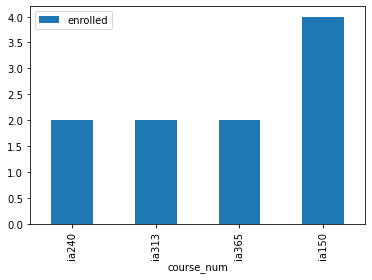

In [14]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='course_num',y='enrolled')

## Q4

In [18]:
sql_statement = """

    select gp1.professor.p_name,
    count (gp1.course.course_num) as teaching_number
    from gp1.professor
    inner join gp1.course
    on gp1.professor.p_email = gp1.course.p_email
    group by professor.p_name
    
    """

<AxesSubplot:xlabel='p_name'>

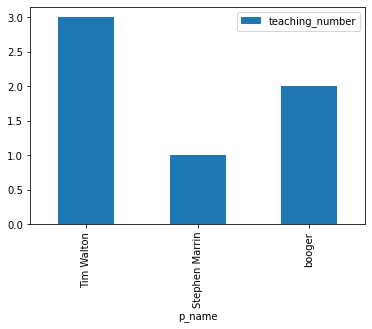

In [19]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='p_name',y='teaching_number')

## Q5

In [21]:
sql_statement = """
                insert into gp1.professor(p_email,p_name,p_office)
                values('{}','{}','{}')
                                
                """.format('s6@dukes.jmu.edu','s5','ia')

print(sql_statement)


                insert into gp1.professor(p_email,p_name,p_office)
                values('s6@dukes.jmu.edu','s5','ia')
                                
                


In [22]:
cur.execute(sql_statement)

In [23]:
conn.commit()

In [24]:
sql_statement = """
                insert into gp1.course(course_num,course_name,p_email)
                values('{}','{}','{}')
                                
                """.format('IA 000','new ia','s6@dukes.jmu.edu')

print(sql_statement)


                insert into gp1.course(course_num,course_name,p_email)
                values('IA 000','new ia','s6@dukes.jmu.edu')
                                
                


In [25]:
cur.execute(sql_statement)

In [26]:
conn.commit()

In [27]:
df_student=pandas.read_sql_query('select * from gp1.professor',conn)
df_student[:]

,p_email,p_name,p_office
0,marrinsp@jmu.edu,Stephen Marrin,isat354
1,weixx@jmu.edu,Xuebin Wei,isat565
2,waltontr@jmu.edu,Tim Walton,isat475
3,booger@dukes.jmu.edu,booger,isat000
4,s6@dukes.jmu.edu,s5,ia


In [28]:
sql_statement = """
    update gp1.course
    set p_email = 's6@dukes.jmu.edu'
    where p_email = 'booger@dukes.jmu.edu'
"""
print(sql_statement)


    update gp1.course
    set p_email = 's6@dukes.jmu.edu'
    where p_email = 'booger@dukes.jmu.edu'



In [29]:
cur.execute(sql_statement)

In [30]:
conn.commit()

## Q6

In [36]:
df_student=pandas.read_sql_query('select * from gp1.course',conn)
df_student[:]

,course_num,course_name,room_num,p_email
0,ia240,intro to python,isat455,marrinsp@jmu.edu
1,ia313,counterfactual,isat789,waltontr@jmu.edu
2,ia340,data mining,isat900,waltontr@jmu.edu
3,ia365,cyber intell,engeo456,waltontr@jmu.edu
4,IA 000,new ia,None,s6@dukes.jmu.edu
5,isat400,water,engeo123,s6@dukes.jmu.edu
6,ia150,intro to ia,isat456,s6@dukes.jmu.edu


In [37]:
sql_statement = """
                delete from gp1.professor
                where p_email = 'booger@dukes.jmu.edu'
                """
print(sql_statement)


                delete from gp1.professor
                where p_email = 'booger@dukes.jmu.edu'
                


In [38]:
cur.execute(sql_statement)

In [39]:
conn.commit()